# Abstract Dynamic Programming

From Sargent and Stachurski (2023), p. 241:

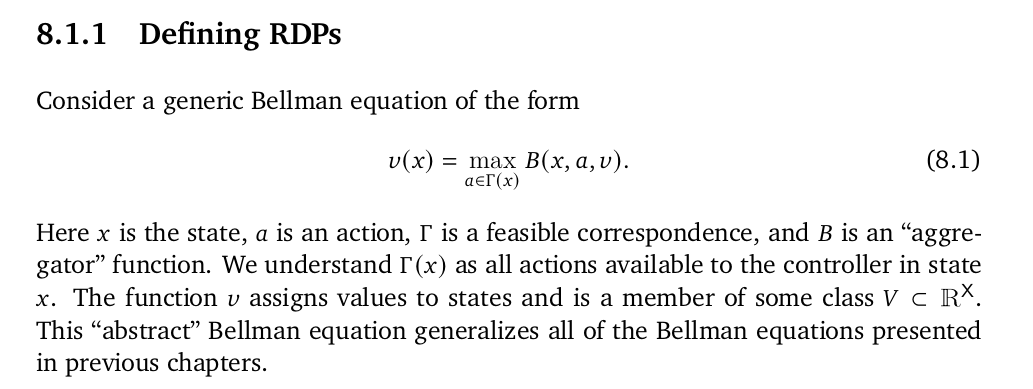

The generality of the aggregator function means that MDPs are a special case.

As are models with:
 - state-dependent discounting. (And other dynamic discounting (stochastic, etc.))
 - Epstein-Zinn preferences
 - risk-sensitive preferences
 
And so on.

From here they define a Recursive Decision Problem (RDP):

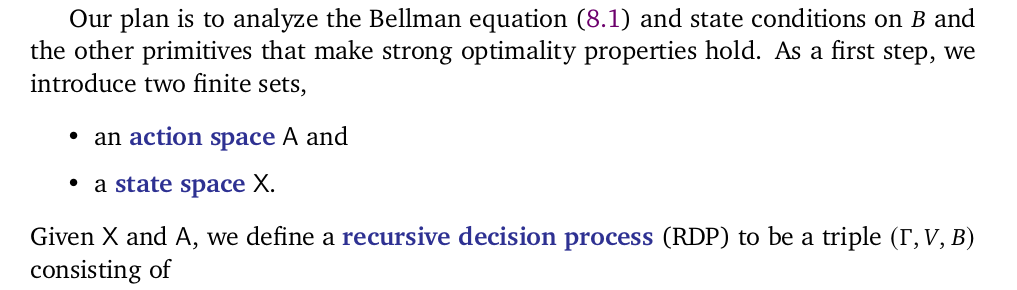


# Relationship to BARK

## BARK as extensible abstract dynamic programming framework

BARK is architected around "blocks".

We could define a kind of block -- **A-block**, provisionally -- to be a generic abstract Bellman aggregator block.

Subclasses or particular configurations of this block -- such as what is currently named **B-block** -- can be more constrained, making it easier to define a model with a restricted subset of aggregators. (For example, classic Bellman equations with stochastic and state dependent discounting.)

More constrained versions of these aggregator blocks would be easier to solve. I.e., an algorithm might be guaranteed to work on all B-blocks, but not all A-blocks.

## BARK blocks are not recursive by default


$$v(x) = \max_a B(g(x,a), \underline{v})$$

where $g: ... \rightarrow Y$ is potentially stochastic where $g: ... \rightarrow P(Y)$. And $\underline{v}: Y \rightarrow ...$

One key decision in BARK is to support lifecycle problems, and this means that we do not require BARK blocks to be recursive, in the sense that the end-of-block state space must be identical to the beginning-of-block space.

Let's call aggregators with distinct start and end states **one-step aggregators**. (SB: I am open to other names!)

Essentially, BARK is intended to gracefully express all possible Decision Problems (\*DP), not just Markov Decision Problems (MDP) or Recursive Decision Problems (RDP).

*Conjecture: All RDP's can be reduced to compositions of DP's with something aggregators ($A$), with a 'twist' ($w$) and 'loop' ($\alpha$) operators.*

Twists are transitions within a period but not within a block.

*On the other hand*, it may be the case that all lifecycle problems are a special case of RDP's, when the feasibility constraints and aging state variables are properly defined. Getting this to work probably requires mental gymnastics and computational sacrifices that are not worth the effort. But it could be explored.

## The B-block already uses a funny aggregator

The optimization problem set up by the B-block, as currently specified, given end-of-block value function $\underline{v}$, which is outside of the block and the continuation value:

$$v(s) = \max_{x \in \Gamma(s, m)} \mathbb{E}_M [r(s, m, x) + \beta(s, m, x) \underline{v}(g(s, m, x))]$$

"That is not a Bellman equation!" you (and Nathan Palmer) exclaim.

Yes and no. It is **not** the classic Bellman equation of the form $v(s) = \max_x r(s, x) + \beta \mathbb{E}_M[v(g(s, m ,x))]$

However, it _is_ a static aggregator.

Moreover, it represents the classic Bellman operator, but 'shifted'. We can call it the **shifted classic Bellman** equation.

*Conjecture: All DP's represented using the classic Bellman equation can be represented using the shifted classic Bellman equation.*
